In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pandas.plotting import scatter_matrix
import math

In [47]:
df=pd.read_csv('final.csv')
df.shape

(19146, 17)

In [48]:
df[df['totalJams']>1000].shape

(34, 17)

In [49]:
# df=df[df['totalJams']<5000]

In [50]:
print df['haikuId'].isna().sum()
print df['l1time'].isna().sum()
print df['l3time'].isna().sum()
print df['spellScore'].isna().sum()


2418
2418
2418
637


In [51]:
do1=df[df['haikuId'].isna()==True]
print do1.shape
print do1['spellScore'].isna().sum()
# df=df.dropna()
print df.shape

(2418, 17)
509
(19146, 17)


In [52]:
print df.isna().sum()
df=df.fillna(value={'timeStampLike':9999999999999,'timeStampComment':9999999999999,'spellScore':0})
df=df.dropna()
print df.shape
# print df.isna().sum()

user_id                 0
hjHandle                0
spellScore            637
amplitude_id            0
haikuId              2418
l1time               2418
l1uid                2418
l2time               2418
l2uid                2418
l3time               2418
l3uid                2418
timeStampLike        8557
timeStampComment    12440
totalJams               0
line1                2418
line2                2418
line3                2418
dtype: int64
(16728, 17)


In [79]:
df['t1']=df['l2time']-df['l1time']
df['t2']=df['l3time']-df['l2time']
# df['tf']=df['l3time']-df['l1time']
df['tl']=df['timeStampLike']-df['l1time']
df['tc']=df['timeStampComment']-df['l1time']


df['pass']=df['totalJams'].apply(lambda x : 1 if x >2 else 0)
# dtf=df[['tf','t2','t1','spellScore','pass','totalJams','tl','tc']]
dtf=df[['t2','t1','spellScore','pass','totalJams','tl','tc']]

In [80]:
df.head()

,user_id,hjHandle,spellScore,amplitude_id,haikuId,l1time,l1uid,l2time,l2uid,l3time,...,timeStampComment,totalJams,line1,line2,line3,t1,t2,tl,tc,pass
0,5bdc6e23e6b52c1e197b08b5,raghavrathi,0.0,71235384773,5be6fae09a79e23e40d71b47,1.541864e+12,5be6fae09a79e23e40d71b47,1.541864e+12,5be6fae09a79e23e40d71b47,1.541864e+12,...,1.000000e+13,2.0,angel of the morning,staring through the window,sweet breez,73343.0,94076.0,2.966910e+05,8.458136e+12,0
2,5be1afae917ca24330e8bc4c,test123584,0.0,71649696909,5be1afcca21c5764599163ae,1.541517e+12,5be1afcca21c5764599163ae,1.541517e+12,5be1afcca21c5764599163ae,1.541518e+12,...,1.541518e+12,2.0,I love eating,Roasted pig and cow,"what about her ""meow""😂",36539.0,359980.0,8.458483e+12,4.566060e+05,0
3,5be1b7044ac7051ceedad817,anaghsoman,0.0,71653426478,5be1b74574386147ef9a85b5,1.541519e+12,5be1b74574386147ef9a85b5,1.541630e+12,5be1b74574386147ef9a85b5,1.541631e+12,...,1.541631e+12,3.0,A chilly hotness subduing hate,just good enough for a decent date,"which is not been so,late",110536234.0,1081126.0,8.458481e+12,1.116775e+08,1
4,5be1b75de870d652b20843f1,itzmimi143,0.0,71653590330,5be1b81c4ac7051ceedada80,1.541519e+12,5be1b81c4ac7051ceedada80,1.541520e+12,5be1b81c4ac7051ceedada80,1.541520e+12,...,1.000000e+13,313.0,Innocent me and innocent world,"lollipops, stuff toys, and playmates I enjoy",lunchboxes packed with maa's love.,401022.0,432404.0,8.515230e+05,8.458481e+12,1
5,5be1b79e2e88e4409f473489,nandakishornair441,0.0,71653788278,5be1b7e574386147ef9a8795,1.541519e+12,5be1b7e574386147ef9a8795,1.541664e+12,5be1b7e574386147ef9a8795,1.541664e+12,...,1.541664e+12,1.0,Gaming for fun,no worries,super happy,144900104.0,54784.0,8.458481e+12,1.450149e+08,0


In [81]:
df[df['pass']==0].shape

(3654, 22)

In [82]:
# from sklearn.linear_model import LogisticRegressionCV
# X=df[['tf','t2','t1','spellScore']]
# y=df[['pass']]
# clf = LogisticRegressionCV(cv=5, random_state=0,multi_class='multinomial').fit(X, y)
# clf.score(X, y) 

In [83]:
from sklearn.linear_model import LogisticRegression
# X=dtf[['tf','t2','t1','spellScore']]
X=dtf.drop(['pass','totalJams'], axis=1)
y=dtf[['pass']]
clf = LogisticRegression().fit(X, y)
# clf.score(X, y) 
print clf.coef_
print clf.intercept_
print np.corrcoef(X['t1'],y['pass'])[0, 1]
print np.corrcoef(X['t2'],y['pass'])[0, 1]
# print np.corrcoef(X['tf'],y['pass'])[0, 1]
# print np.corrcoef(X['tl'],y['pass'])[0, 1]
# print np.corrcoef(X['tc'],y['pass'])[0, 1]

[[-2.83664411e-19 -5.15278640e-19  3.11012968e-26 -6.26077380e-15
   2.38740780e-13]]
[1.24397639e-25]
-0.020448621201620117
-0.006174784135572871


In [84]:

# print clf.predict_proba([[167419,94076,73343,1]])
print clf.predict_proba(X)[:,1]

X['prob1']=clf.predict_proba(X)[:,1]
X['pass']=y['pass']

[0.88280881 0.48676396 0.4867706  ... 0.50000002 0.50000008 0.50000005]


In [85]:
X.head()

,t2,t1,spellScore,tl,tc,prob1,pass
0,94076.0,73343.0,0.0,2.966910e+05,8.458136e+12,0.882809,0
2,359980.0,36539.0,0.0,8.458483e+12,4.566060e+05,0.486764,0
3,1081126.0,110536234.0,0.0,8.458481e+12,1.116775e+08,0.486771,1
4,432404.0,401022.0,0.0,8.515230e+05,8.458481e+12,0.882817,1
5,54784.0,144900104.0,0.0,8.458481e+12,1.450149e+08,0.486773,0


In [86]:
X.to_csv('result.csv')

In [90]:
print clf.predict_proba(X)

ValueError: X has 7 features per sample; expecting 5

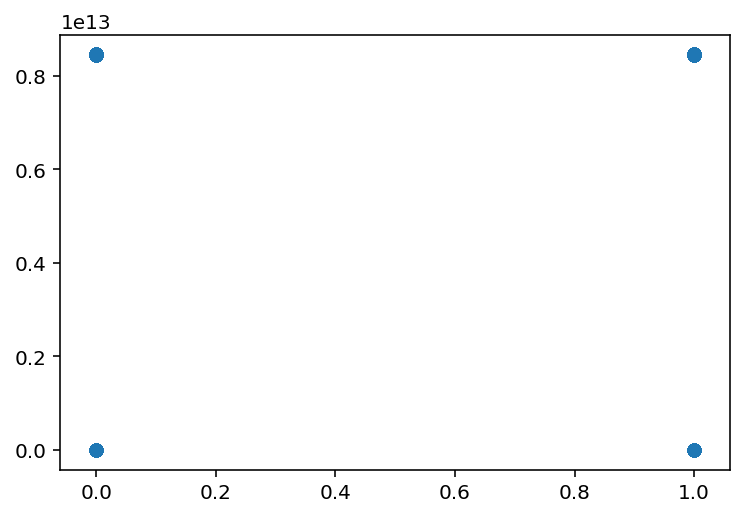

In [37]:
plt.scatter(df['pass'],df['tc'])
plt.show()

In [40]:
# df.hist(column='spellScore')

In [41]:
# df['tc'].value_counts()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d061999d0>]],
      dtype=object)

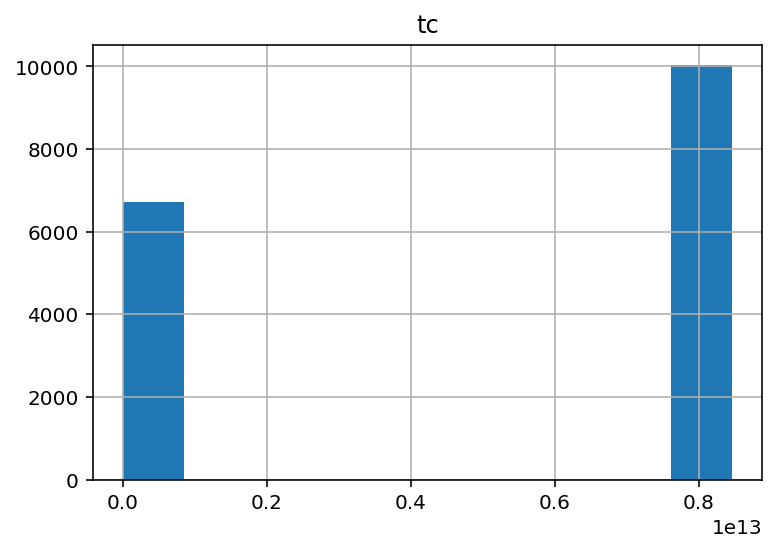

In [39]:
df.hist(column='tc')

In [36]:
rdf=df.dropna(subset=['spellScore'], how='all')

In [37]:
rdf.shape

(10566, 6)

In [38]:
df.head()

,tf,t2,t1,spellScore,pass,totalJams
0,241428.0,179705.0,61723.0,0.000000,1,808.0
2,738424.0,122634.0,615790.0,0.000000,1,109.0
3,1266098.0,916137.0,349961.0,0.000000,1,670.0
4,60945.0,43176.0,17769.0,0.562963,1,784.0
5,878052.0,771565.0,106487.0,0.134705,1,227.0


In [39]:
rdf=rdf.fillna(99999999999.0)

In [34]:
# rdf.isnull().any

ValueError: Solver liblinear does not support a multinomial backend.

In [45]:
print clf.coef_
print clf.intercept_


# m = clf.coef_[0,0]
# b = clf.intercept_[0]

# #generate values for curve overlay
# lgs_curve = lambda x: 1/(1 + math.e**(-(m*x+b)))         
# x_values = np.linspace(2, 10, 100)
# y_values = lgs_curve(x_values)

# #plot it
# # plt.plot(x_values, y_values)
# plt.scatter(rdf['t1'], rdf['pass'], c='r', s=.01)
# # plt.xlabel("t1")
# # plt.ylabel("")


[[-4.52543081e-10  4.41425079e-10  3.57964631e-16]]
[2.25094251e-15]


In [24]:
clf.get_params(deep=True)

NameError: name 'clf' is not defined

In [25]:
print clf.coef_ 

NameError: name 'clf' is not defined

In [26]:
print clf.scores_

NameError: name 'clf' is not defined

In [27]:
y.shape

(10566, 1)

In [28]:
from pydoc import help
from scipy.stats.stats import pearsonr
# print pearsonr(X['tf'],y)
print pearsonr(X['t1'],y['pass'])
print pearsonr(X['t2'],y['pass'])

(-0.3269449722749312, 1.1153508630301523e-261)
(-0.3269452693173211, 1.114069350428311e-261)


In [29]:
import numpy
print numpy.corrcoef(X['t1'],y['pass'])[0, 1]
print numpy.corrcoef(X['t2'],y['pass'])[0, 1]
print numpy.corrcoef(X['tf'],y['pass'])[0, 1]

-0.3269449722749317
-0.32694526931732154
-0.32694305208874236


In [30]:
y.head()

,pass
0,1
2,1
3,1
4,1
5,1


In [31]:
X['t1'].shape

(10566,)